In [2]:
import cv2

import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

import scipy as scipy
import scipy.interpolate
from scipy.stats import wasserstein_distance
from scipy.fft import fft
import polarTransform
from marvin.tools import Maps

import Bicone_Classifier



In [3]:
PATH = '/Users/runquanguan/Documents/Research/MaNGA-AGN/Pipeline&Instrction/obvious_bicone_feature_position.fits'
hdul = fits.open(PATH)
hdu = hdul[1].data


for data in hdu:
        plateifu = str(data[0])
        #BC_EW_hist = Bicone_Classifier.generate_profile_histogram(plateifu)
        #plt.plot(BC_EW_hist, alpha = 0.5)

#x = np.linspace(0,4*np.pi,500)
#y = 0.5*np.cos(x)+0.5
#plt.plot(y, color = 'k')
plt.show()
        

In [4]:
## see if there's any difference between different curve shapes
Comp = ['7972-3704','8486-12705','8715-6103','8718-12702','10518-3704','11826-6103','11958-3703','12673-6101','12700-6101','7958-9101']
Single = ['8138-6101','8252-9101','8465-12704','9031-12704','9867-9102','10502-12701','10517-3701']

for plateifu in Comp:
    pass
        #BC_EW_hist = Bicone_Classifier.generate_profile_histogram(plateifu)[0]
        #print(plateifu)
        #plt.plot(BC_EW_hist, alpha = 0.5)

x = np.linspace(0,4*np.pi,500)
y1 = 0.4*np.cos(x)+0.4
y2 = 0.1*np.cos(5*(x+np.pi))
y = np.add(y1, y2)
#plt.plot(y, color = 'k')
#plt.show()

In [6]:
HEADER_PATH = '/Users/runquanguan/Documents/dapall-v3_1_1-3.1.0.fits'
header_hdul = fits.open(HEADER_PATH)['SPX-MILESHC-MASTARSSP'].data
plateifu = header_hdul['plateifu']

for data in plateifu[0:20]:
        plateifu = data
        BC_EW_hist = Bicone_Classifier.generate_profile_histogram(plateifu)
        print(Bicone_Classifier.fourier_classifier(BC_EW_hist))


[WARNING]: unclosed file <_io.FileIO name='/Users/runquanguan/Documents/dapall-v3_1_1-3.1.0.fits' mode='rb' closefd=True> (ResourceWarning)


(2, '7443-1902')
(8, '7443-12704')
(2, '7443-1901')
(4, '7443-3702')
(4, '7443-3704')
(2, '7443-12701')
(4, '7443-3701')
(2, '7443-12705')
(6, '7443-6104')
(2, '7443-6102')
(4, '7443-6103')
(2, '7443-3703')
(2, '7443-9101')
(2, '7443-6101')
(2, '7443-9102')
(2, '7443-12703')
(2, '7443-12702')
(2, '7495-6103')
(2, '7495-1901')
(4, '7495-1902')


## Fourier Method 

In [39]:
SAMPLE_RATE = 125  # data point per sec
DURATION = 4  # data length in sec
N = SAMPLE_RATE * DURATION
for plateifu in Comp:
        BC_EW_hist = Bicone_Classifier.generate_profile_histogram(plateifu,method='min',smooth=10,cycle = 2)[0]
        yf = np.abs(fft(BC_EW_hist-0.5)[0:50])
        max_index = list(yf).index(max(yf))
        print(plateifu,':',max_index)


7972-3704 : 4
8486-12705 : 4
8715-6103 : 4
8718-12702 : 4
10518-3704 : 4
11826-6103 : 4
11958-3703 : 4
12673-6101 : 0
12700-6101 : 4
7958-9101 : 4


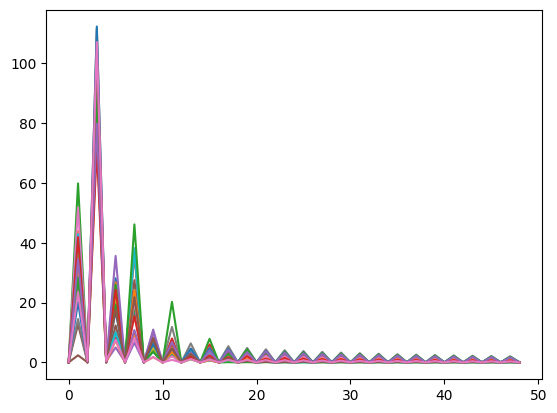

In [39]:
## see if there's any difference between different curve shapes
Comp = ['7972-3704','8486-12705','8715-6103','8718-12702','10518-3704','11826-6103','11958-3703','12673-6101','12700-6101','7958-9101']
Single = ['8138-6101','8252-9101','8465-12704','9031-12704','9867-9102','10502-12701','10517-3701']
total = Comp + Single

for i in total:
    BC_EW_hist = Bicone_Classifier.generate_profile_histogram(i ,method='min',smooth=10,cycle = 2)[0]
    yf = np.abs(fft(BC_EW_hist-0.5)[1:50])
    #yf.sort()
    #loss = sum(np.diff(yf[-4:]))
    #print(loss)
    #max_index = list(yf).index(max(yf))
    plt.plot(yf)

plt.show()

[WARNING]: unclosed file <_io.FileIO name='/Users/runquanguan/Documents/bicone_candidates_v2.fits' mode='rb' closefd=True> (ResourceWarning)


70.25026718703012
23.717728347233766
41.33523077819102
8.192112517604212
25.634935043862694
71.67199622109928
47.187438552104005
60.87817693397923
55.80707583295219
38.134358957286686
54.26626895296889
49.3533660146441
53.824165842126526
59.25720918471243
13.188246555602223
42.09711949913196
46.04526181844175
57.468136743429724
55.58265891747669
68.09908176669855
52.85310410805113
41.49545920331332
23.745432107484067
24.285164432761245
38.68269789636035
68.68343366008935
29.225775868091997
44.63426204673908
30.28294749786008
47.68176390307891


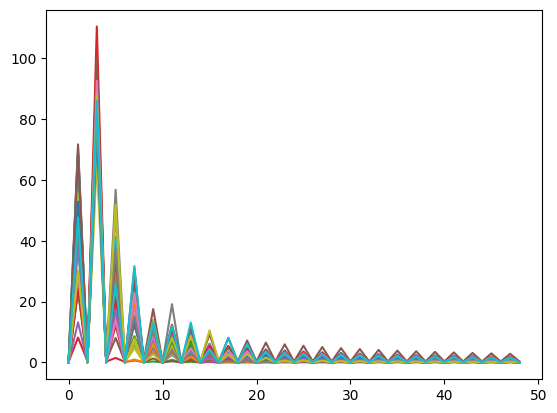

In [47]:
HEADER_PATH = '/Users/runquanguan/Documents/bicone_candidates_v2.fits'
hdul = fits.open(HEADER_PATH)
hdu = hdul[1].data
plateifu = hdu['PLATEIFU']

#fig, axes = plt.subplots (nrows=4, ncols=5,figsize =(12,11))

for i in plateifu[0:30]:
    BC_EW_hist = Bicone_Classifier.generate_profile_histogram(i ,method='min',smooth=10,cycle = 2)[0]
    yf = np.abs(fft(BC_EW_hist-0.5)[1:50])
    print(yf[1])
    #max_index = list(yf).index(max(yf))
    plt.plot(yf)
    
    #yf.sort()
    #loss = sum(np.diff(yf[-4:]))
    #print(loss)

plt.show()